[7.412 6.884 6.103 5.493 5.199 7.412 6.884 6.103 5.493 5.199]
m: -0.3309984602371097 +- 0.038092287896088727
b: 1.0169038307201737 +- 0.2316415605682975
[-1.4364567565572837, -1.2616895695520896, -1.0031797721069067, -0.8012707113622701, -0.7039571640525597, -1.4364567565572837, -1.2616895695520896, -1.0031797721069067, -0.8012707113622701, -0.7039571640525597]
[0.06354324344271634, 0.03831043044791049, 0.09682022789309341, 0.06872928863772987, 0.13604283594744027, 0.036456756557283754, 0.061689569552089596, 0.07317977210690663, 0.09127071136227016, 0.09395716405255972]
0.06575922629205797
0.08109206267697103


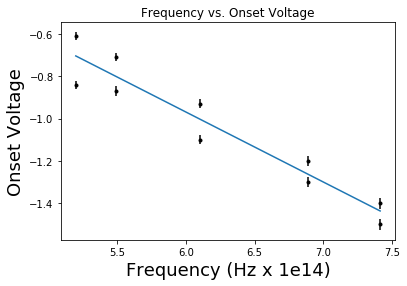

<Figure size 432x288 with 0 Axes>

In [24]:
arr1 = [7.412,6.884,6.103,5.493,5.199,7.412,6.884,6.103,5.493,5.199] 
arr2 = [-1.5,-1.3,-1.1,-.87,-0.84,-1.4,-1.2,-0.93,-0.71,-0.61]

import numpy as np                                
import matplotlib.pyplot as plt
from scipy import optimize                     

file_name = 'shit.txt'                       
file_folder = ''                               
data_file = file_folder + file_name

xdata, ydata, yerr = np.loadtxt(                      
        data_file,                               
        delimiter = ',',                      
        skiprows = 1,
        usecols = (0, 1, 2),                      
        unpack = True)    

def func(x,m,b):                                 
    return m*x+b                                
 
initialguess = [1,1]                     
                                        
fit, covariance = optimize.curve_fit(            
        func,                                    
        xdata,                                  
        ydata,
        initialguess,
        yerr)                           

print("m:",fit[0],"+-",np.sqrt(covariance[0][0]))    
print("b:",fit[1],"+-",np.sqrt(covariance[1][1]))   

xdatafit=np.linspace(min(xdata), max(xdata), 100) 
func_plot=func(xdatafit,*fit)       

plt.plot(xdatafit, func_plot)                  
plt.errorbar(xdata, ydata, yerr, fmt='k.')             
xdatafit=np.linspace(min(xdata), max(xdata), 100)
func_plot=func(xdatafit,*fit)    

plt.title('Frequency vs. Onset Voltage')
plt.xlabel('Frequency (Hz x 1e14)',fontsize = 18)
plt.ylabel('Onset Voltage',fontsize = 18)

trendline_points = [] # declaring array that will calulate y = mx+b of trendline at points of interest
deltas = [] # array with absolute values of the differences of each point on our plot and its point on the trendline
sum_of_deltas = 0 # declaring our sum of the deltas squared

def func2(m,x,b):   # definding our trendline function with curvefit parameters
    return m*x+b

for i in range(len(arr1)):
    trendline_points.append(func2(fit[0],arr1[i],fit[1]))  # calculate each point on the trendline
    deltas.append(abs(arr2[i]-trendline_points[i]))        # find the difference between each point and the trend
    sum_of_deltas = sum_of_deltas + (deltas[i]**2)         # sum these values
    
stddev = np.sqrt(sum_of_deltas/10)     # get std dev by taking squareroot of (sum_of_deltas)/10 because there are 10 points
    
print(trendline_points)
print(deltas)
print(sum_of_deltas)
print(stddev)

plt.show()
plt.clf()